<a href="https://colab.research.google.com/github/Akashsuga/Task-8-KMeans_Clustering/blob/main/task_8_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

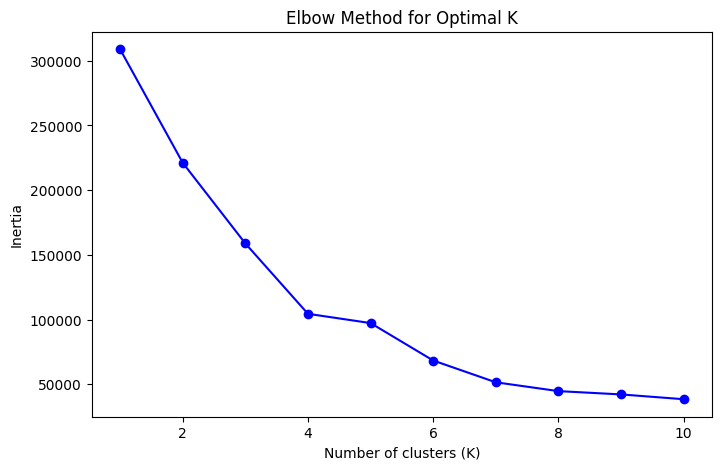

Silhouette Score for K=5: 0.357


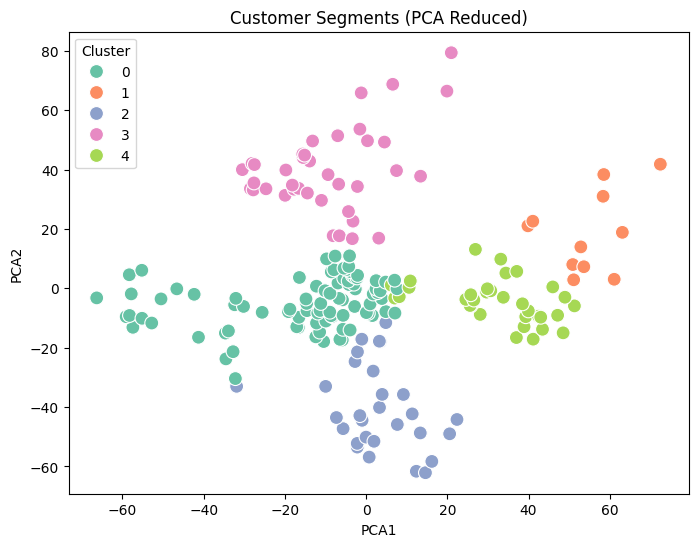


Cluster Summary:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.617978  46.213483           47.719101               41.797753   
1        0.545455  32.454545          108.181818               82.727273   
2        0.517241  24.689655           29.586207               73.655172   
3        0.473684  40.394737           87.000000               18.631579   
4        0.545455  31.787879           76.090909               77.757576   

              PCA1       PCA2  
Cluster                        
0       -15.554202  -4.594188  
1        54.806618  18.992162  
2         2.880075 -40.354039  
3        -9.541838  39.693169  
4        32.136935  -4.184980  


In [3]:
# kmeans_clustering.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Drop 'CustomerID' (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)

# Encode 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize columns
features = df.copy()

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig("elbow_plot.png")
plt.show()

# From elbow plot, optimal K ~ 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Silhouette Score
score = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {score:.3f}")

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments (PCA Reduced)")
plt.savefig("cluster_pca_visual.png")
plt.show()

# Cluster-wise stats
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print("\nCluster Summary:\n", cluster_summary)

# Save cluster summary to CSV
cluster_summary.to_csv("cluster_summary.csv")
